In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
df = pd.read_csv("C:/Users/sande/Downloads/archive (1)/database.csv")
df.head()
# Remove rows where "Incident Year" is between 1990 and 1999
# This was done to clean the data as these years had inconsistent reporting
df = df[~df["Incident Year"].between(1990, 1999)]
#saving cleaned data
df.to_csv("database.csv", index=False)

C:\Users\sande\AppData\Local\Temp\ipykernel_30424\464373568.py:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/sande/Downloads/archive (1)/database.csv")


In [46]:
df = pd.read_csv("C:/Users/sande/Downloads/BSP/database.csv")
df.head()
# removing rows where there is "UNKNOWN" in a cell
df = df[~df["Operator"].str.lower().eq("unknown")]
df.head()


C:\Users\sande\AppData\Local\Temp\ipykernel_30424\2530847473.py:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/sande/Downloads/BSP/database.csv")


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,206593,2000,1,1,UAL,UNITED AIRLINES,B-737-300,A,148,24.0,...,1,0,0,0,0,0,0,0,0,0
1,204787,2000,1,1,AAL,AMERICAN AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0
3,200508,2000,1,1,COA,CONTINENTAL AIRLINES,B-757-200,A,148,26.0,...,0,0,0,0,0,0,0,0,0,0
4,203122,2000,1,1,USCBP,US CUSTOMS AND BORDER PROTECTION,C-550,A,226,37.0,...,0,0,0,0,0,0,0,0,0,0
5,204095,2000,1,1,UAL,UNITED AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:

# Explore unique values in "Engine Type"
df["Engine Type"].unique()
# Count missing values in "Engine Type"
df["Engine Type"].isna().sum()
# Drop rows with missing "Aircraft Type"
df = df.dropna(subset=["Aircraft Type"])





In [48]:
df["Aircraft Damage"] = df["Aircraft Damage"].replace({0: "No", 1: "Yes"})
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,206593,2000,1,1,UAL,UNITED AIRLINES,B-737-300,A,148,24.0,...,1,0,0,0,0,0,0,0,0,0
1,204787,2000,1,1,AAL,AMERICAN AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0
3,200508,2000,1,1,COA,CONTINENTAL AIRLINES,B-757-200,A,148,26.0,...,0,0,0,0,0,0,0,0,0,0
4,203122,2000,1,1,USCBP,US CUSTOMS AND BORDER PROTECTION,C-550,A,226,37.0,...,0,0,0,0,0,0,0,0,0,0
5,204095,2000,1,1,UAL,UNITED AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike
0,206593,2000,1,1,UAL,UNITED AIRLINES,B-737-300,A,148,24.0,...,0,1,0,0,0,0,0,0,0,0
1,204787,2000,1,1,AAL,AMERICAN AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0
3,200508,2000,1,1,COA,CONTINENTAL AIRLINES,B-757-200,A,148,26.0,...,0,0,0,0,0,0,0,0,0,0
4,203122,2000,1,1,USCBP,US CUSTOMS AND BORDER PROTECTION,C-550,A,226,37.0,...,1,0,0,0,0,0,0,0,0,0
5,204095,2000,1,1,UAL,UNITED AIRLINES,B-727-200,A,148,11.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Rename column "Visibility" to "TimeOfDay"
df = df.rename(columns={'Visibility': 'TimeOfDay'})

In [52]:
# Create "Incident Date" from year, month, day columns
df["Incident Date"] = pd.to_datetime(
    df.rename(columns={
        "Incident Year": "year",
        "Incident Month": "month",
        "Incident Day": "day"
    })[["year", "month", "day"]],
    errors="coerce"
)

# Move "Incident Date" to second column position
df.insert(1, "Incident Date", df.pop("Incident Date"))  

In [72]:
cols_to_drop = [
    "Species Quantity",
    "Warning Issue",
    "Random Damage",
    "Other Damage",
    "FAA Region",
    "Species ID",
    "Injuries",
    "Fatalities",
    "Distance"
    "Record ID",
    "Operator ID",
    "Airport ID",
    "Engine1 Position",
    "Engine2 Position",
    "Engine3 Position",
    "Engine4 Position",
    "Radome Strike", "Radome Damage",
    "Windshield Strike", "Windshield Damage",
    "Nose Strike", "Nose Damage",
    "Engine1 Strike", "Engine1 Damage",
    "Engine2 Strike", "Engine2 Damage",
    "Engine3 Strike", "Engine3 Damage",
    "Engine4 Strike", "Engine4 Damage",
    "Propeller Strike", "Propeller Damage",
    "Wing or Rotor Strike", "Wing or Rotor Damage",
    "Fuselage Strike", "Fuselage Damage",
    "Landing Gear Strike", "Landing Gear Damage",
    "Tail Strike", "Tail Damage",
    "Lights Strike", "Lights Damage",
    "Other Strike",
    "Speed"
]

df = df.drop(columns=cols_to_drop, errors="ignore")


In [73]:
df.head()

,Incident Date,Incident Year,Incident Month,Incident Day,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,...,Flight Phase,Visibility,Precipitation,Height,Species Name,Flight Impact,Aircraft Damage,Engine Ingested,Weather Condition,Season
0,2000-01-01,2000,1,1,UNITED AIRLINES,B-737-300,A,148,24.0,4.0,...,NAN,NaN,NaN,NaN,UNKNOWN MEDIUM BIRD,NaN,No,0,Clear,Winter
1,2000-01-01,2000,1,1,AMERICAN AIRLINES,B-727-200,A,148,11.0,4.0,...,TAKEOFF RUN,DAWN,NONE,0.0,UNKNOWN SMALL BIRD,NONE,No,0,Clear,Winter
3,2000-01-01,2000,1,1,CONTINENTAL AIRLINES,B-757-200,A,148,26.0,4.0,...,TAKEOFF RUN,DAY,FOG,0.0,UNKNOWN MEDIUM BIRD,NaN,No,0,Clear,Winter
4,2000-01-01,2000,1,1,US CUSTOMS AND BORDER PROTECTION,C-550,A,226,37.0,3.0,...,EN ROUTE,DAY,NaN,1000.0,UNKNOWN LARGE BIRD,PRECAUTIONARY LANDING,Yes,0,Clear,Winter
5,2000-01-01,2000,1,1,UNITED AIRLINES,B-727-200,A,148,11.0,4.0,...,APPROACH,NaN,NaN,NaN,UNKNOWN MEDIUM BIRD,NaN,No,0,Clear,Winter


In [57]:
df.shape
df.info()
df.describe(include='object')


<class 'pandas.core.frame.DataFrame'>
Index: 103632 entries, 0 to 141358
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Incident Date    103632 non-null  datetime64[ns]
 1   Incident Year    103632 non-null  int64         
 2   Incident Month   103632 non-null  int64         
 3   Incident Day     103632 non-null  int64         
 4   Operator         103632 non-null  object        
 5   Aircraft         103632 non-null  object        
 6   Aircraft Type    103632 non-null  object        
 7   Aircraft Make    102057 non-null  object        
 8   Aircraft Model   95402 non-null   object        
 9   Aircraft Mass    99825 non-null   float64       
 10  Engine Make      97684 non-null   float64       
 11  Engine Model     96640 non-null   object        
 12  Engines          99985 non-null   float64       
 13  Engine Type      99947 non-null   object        
 14  Airport          103344 n

,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Engine Model,Engine Type,Airport,State,Warning Issued,Flight Phase,Visibility,Precipitation,Species Name,Flight Impact,Aircraft Damage
count,103632,103632,103632,102057,95402.0,96640,99947,103344,84737,56246,89355,82404,68064,103553,80173,103632
unique,417,564,3,87,121.0,103,9,1936,62,4,12,5,8,622,6,2
top,SOUTHWEST AIRLINES,B-737-700,A,148,10.0,1,D,UNKNOWN,CA,N,APPROACH,DAY,NONE,UNKNOWN MEDIUM BIRD,NONE,No
freq,12397,7371,101725,37056,8102.0,22524,84958,15916,8197,31628,37573,50613,62609,26634,71912,93907


In [58]:
# Analyze target variable "Aircraft Damage"
df['Aircraft Damage'].value_counts()
df['Aircraft Damage'].value_counts(normalize=True) * 100

Aircraft Damage
No     90.615833
Yes     9.384167
Name: proportion, dtype: float64

In [59]:
phase_risk = (
    df.groupby('Flight Phase')['Aircraft Damage']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)

phase_risk['Yes'] = phase_risk['Yes'] * 100
phase_risk.sort_values('Yes', ascending=False)


Aircraft Damage,No,Yes
Flight Phase,,
EN ROUTE,0.653737,34.626301
DESCENT,0.838901,16.109937
CLIMB,0.856594,14.340625
APPROACH,0.914779,8.522077
PARKED,0.920000,8.000000
LOCAL,0.925926,7.407407
TAKEOFF RUN,0.928937,7.106310
LANDING,0.940000,6.000000
LANDING ROLL,0.942787,5.721346


In [60]:
# Standardize categorical variables
df['Aircraft Damage'] = (
    df['Aircraft Damage']
    .astype(str)
    .str.strip()
    .str.capitalize()
)

# Standardize "Flight Phase"
df['Flight Phase'] = (
    df['Flight Phase']
    .astype(str)
    .str.strip()
    .str.upper()
)






In [61]:
# Explore unique values in "Flight Phase"
df['Flight Phase'].unique()


array(['NAN', 'TAKEOFF RUN', 'EN ROUTE', 'APPROACH', 'CLIMB',
       'LANDING ROLL', 'DESCENT', 'ARRIVAL', 'TAXI', 'PARKED', 'LOCAL',
       'DEPARTURE', 'LANDING'], dtype=object)

In [62]:
airport_phase_damage_contribution = (
    df[df['Aircraft Damage'] == 'Yes']
    .groupby(['Airport', 'Flight Phase'])
    .size()
    .sort_values(ascending=False)
)


In [64]:
# Analyze relationship between "Precipitation" and "Aircraft Damage"
pd.crosstab(
    df['Precipitation'],
    df['Aircraft Damage'],
    normalize='index'
) * 100


Aircraft Damage,No,Yes
Precipitation,,
FOG,87.791741,12.208259
"FOG, RAIN",85.903084,14.096916
"FOG, RAIN, SNOW",80.000000,20.000000
"FOG, SNOW",91.666667,8.333333
NONE,90.370394,9.629606
RAIN,89.566572,10.433428
"RAIN, SNOW",58.823529,41.176471
SNOW,84.581498,15.418502


In [65]:
# Analyze relationship between "Visibility" and "Aircraft Damage"
pd.crosstab(
    df['Visibility'],
    df['Aircraft Damage'],
    normalize='index'
) * 100


Aircraft Damage,No,Yes
Visibility,,
DAWN,90.625000,9.375000
DAY,90.978602,9.021398
DUSK,88.904858,11.095142
NIGHT,89.581475,10.418525
UNKNOWN,100.000000,0.000000


In [66]:
# Analyze relationship between "Species Name" and "Aircraft Damage"
pd.crosstab(
    df['Species Name'],
    df['Aircraft Damage']
)


Aircraft Damage,No,Yes
Species Name,,
ACADIAN FLYCATCHER,5,0
ALDER FLYCATCHER,8,1
AMERICAN ALLIGATOR,4,0
AMERICAN AVOCET,1,1
AMERICAN BITTERN,5,2
...,...,...
YELLOW-THROATED VIREO,1,0
YELLOW-THROATED WARBLER,7,0
YUMA MYOTIS,1,0


In [67]:
# Analyze relationship between "Aircraft Mass" and "Aircraft Damage"
pd.crosstab(
    df['Aircraft Mass'],
    df['Aircraft Damage'],
    normalize='index'
) * 100


Aircraft Damage,No,Yes
Aircraft Mass,,
1.0,70.217226,29.782774
2.0,75.769721,24.230279
3.0,90.702220,9.297780
4.0,93.351528,6.648472
5.0,80.730223,19.269777


In [111]:
precip = (
    df['Precipitation']
    .astype(str)
    .str.upper()
    .str.strip()
)

# create Visibility column
df['Visibility'] = 'Clear'  # default

df.loc[precip.str.contains('RAIN|SNOW', regex=True), 'Visibility'] = 'Moderate'
df.loc[precip.str.contains('FOG', regex=True), 'Visibility'] = 'Poor'

# handle real NaN separately
df.loc[df['Precipitation'].isna(), 'Visibility'] = 'Clear'

In [112]:
df.head()

,Incident Date,Incident Year,Incident Month,Incident Day,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,...,Flight Phase,TimeOfDay,Precipitation,Height,Species Name,Flight Impact,Aircraft Damage,Engine Ingested,Season,Visibility
0,2000-01-01,2000,1,1,UNITED AIRLINES,B-737-300,A,148,24.0,4.0,...,NAN,NaN,NaN,NaN,UNKNOWN MEDIUM BIRD,NaN,No,0,Winter,Clear
1,2000-01-01,2000,1,1,AMERICAN AIRLINES,B-727-200,A,148,11.0,4.0,...,TAKEOFF RUN,DAWN,NONE,0.0,UNKNOWN SMALL BIRD,NONE,No,0,Winter,Clear
3,2000-01-01,2000,1,1,CONTINENTAL AIRLINES,B-757-200,A,148,26.0,4.0,...,TAKEOFF RUN,DAY,FOG,0.0,UNKNOWN MEDIUM BIRD,NaN,No,0,Winter,Poor
4,2000-01-01,2000,1,1,US CUSTOMS AND BORDER PROTECTION,C-550,A,226,37.0,3.0,...,EN ROUTE,DAY,NaN,1000.0,UNKNOWN LARGE BIRD,PRECAUTIONARY LANDING,Yes,0,Winter,Clear
5,2000-01-01,2000,1,1,UNITED AIRLINES,B-727-200,A,148,11.0,4.0,...,APPROACH,NaN,NaN,NaN,UNKNOWN MEDIUM BIRD,NaN,No,0,Winter,Clear


In [69]:
# Create a new feature "Season" based on "Incident Month"
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['Incident Month'].apply(season)


In [107]:
df["Weather Condition"].unique()

array(['Clear'], dtype=object)

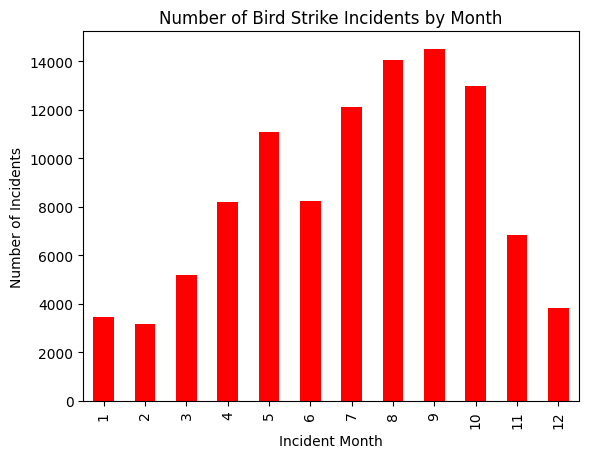

In [85]:
month_counts = df['Incident Month'].value_counts().sort_index()

# Plot
plt.figure()
month_counts.plot(kind='bar', color='red')

plt.xlabel('Incident Month')
plt.ylabel('Number of Incidents')
plt.title('Number of Bird Strike Incidents by Month')

plt.show()

In [ ]:
# Clean dataset by removing rows with missing values in key columns
df_clean = df.dropna(subset=['Airport', 'Flight Phase', 'Aircraft Damage'])


In [ ]:
# Calculate damage rates by Airport and Flight Phase
airport_phase_damage_rate = (
    df_clean
    .groupby(['Airport', 'Flight Phase'])['Aircraft Damage']
    .value_counts(normalize=True)
    .unstack()
    .reindex(columns=['Yes', 'No'], fill_value=0)
    * 100
)


In [76]:
# Visualize top 10 airports by damage rate across flight phases
top_airports = (
    df['Airport']
    .value_counts()
    .head(10)
    .index
)
# Create a pivot table for heatmap visualization
pivot = (
    airport_phase_damage_rate
    .loc[top_airports]['Yes']
    .unstack()
)


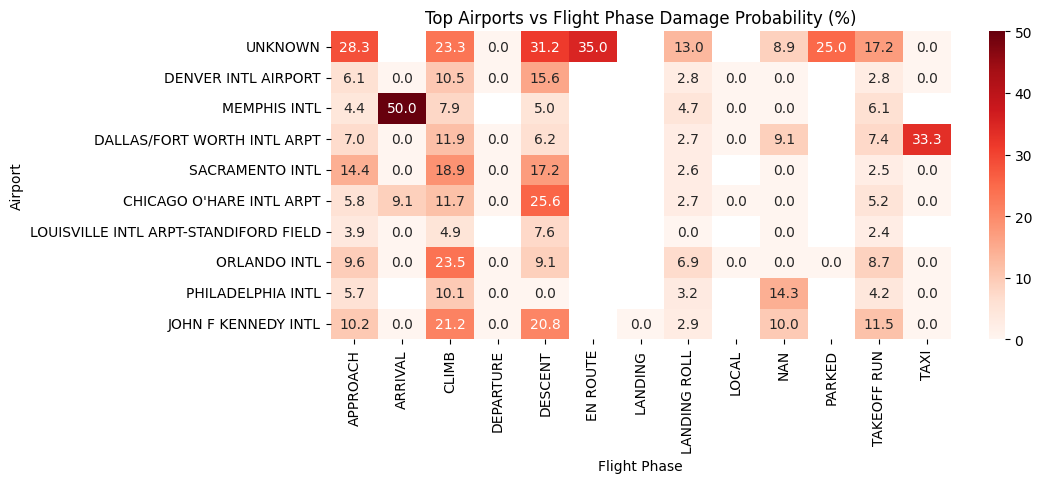

In [ ]:
# Plot heatmap
plt.figure(figsize=(10,4))
sns.heatmap(pivot, cmap='Reds', annot=True, fmt='.1f')
plt.title('Top Airports vs Flight Phase Damage Probability (%)')
plt.show()


<Axes: title={'center': 'Bird Strike Count by Season'}, xlabel='Season'>

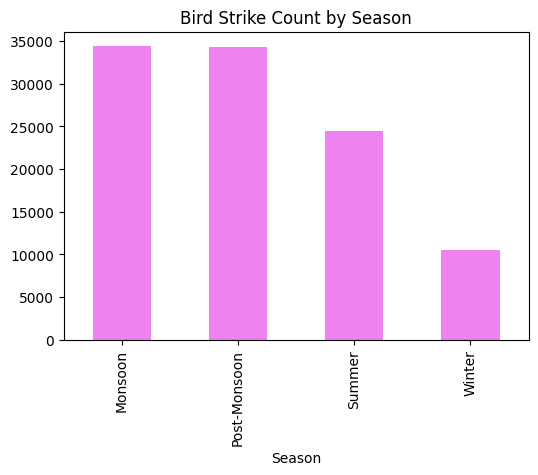

In [88]:
# Visualize bird strike counts by season
df['Season'].value_counts().plot(
    kind='bar',
    color='violet',
    figsize=(6,4),
    title='Bird Strike Count by Season'
)


In [ ]:
df['Season'].value_counts(dropna=False)


Season
Monsoon         34377
Post-monsoon    34326
Summer          24471
Winter          10458
Name: count, dtype: int64

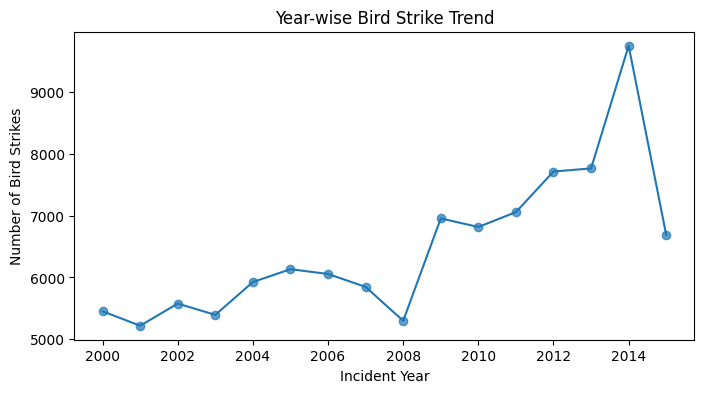

In [ ]:
# Visualize year-wise bird strike trend
yearly_strikes = (
    df.groupby('Incident Year')
    .size()
    .reset_index(name='Strike Count')
)


plt.figure(figsize=(8,4))
plt.scatter(
    yearly_strikes['Incident Year'],
    yearly_strikes['Strike Count'],
    alpha=0.7
)
plt.plot(
    yearly_strikes['Incident Year'],
    yearly_strikes['Strike Count']
)

plt.xlabel('Incident Year')
plt.ylabel('Number of Bird Strikes')
plt.title('Year-wise Bird Strike Trend')
plt.show()


In [ ]:
# Clean "Airport" column
df_airport_clean = df.copy()

df_airport_clean['Airport'] = (
    df_airport_clean['Airport']
    .astype(str)
    .str.strip()
)

df_airport_clean = df_airport_clean[
    ~df_airport_clean['Airport'].str.lower().isin(
        ['unknown', 'unk', 'nan', 'none', '']
    )
]


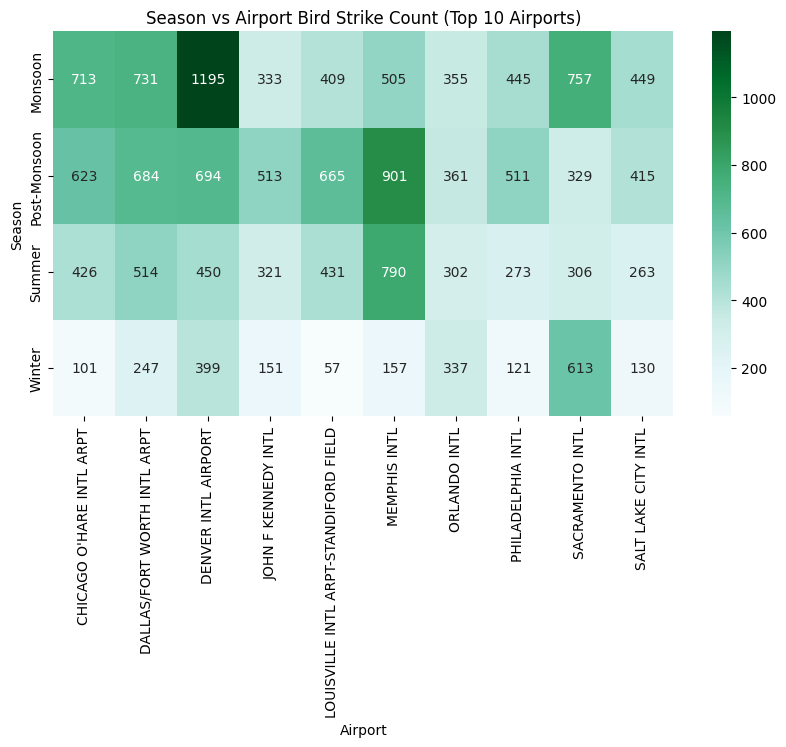

In [ ]:
# Identify top 10 airports by bird strike count
top_airports = df_airport_clean['Airport'].value_counts().head(10).index

# Create season vs airport matrix
season_airport_heatmap = (
    df_airport_clean[df_airport_clean['Airport'].isin(top_airports)]
    .groupby(['Season', 'Airport'])
    .size()
    .unstack(fill_value=0)
)

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    season_airport_heatmap,
    cmap='BuGn',
    annot=True,
    fmt='g'
)

plt.title('Season vs Airport Bird Strike Count (Top 10 Airports)')
plt.xlabel('Airport')
plt.ylabel('Season')

plt.show()

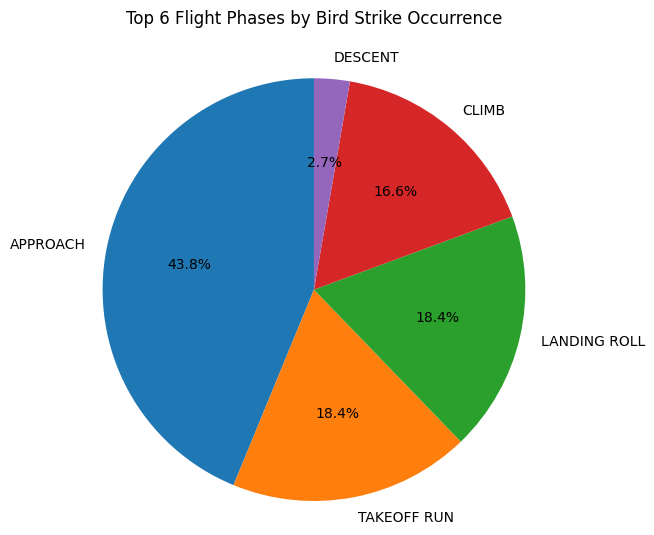

In [ ]:
phase_counts = df['Flight Phase'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(
    phase_counts,
    labels=phase_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title(
    'Top 6 Flight Phases by Bird Strike Occurrence',
    pad=25   
)

plt.axis('equal')
plt.show()


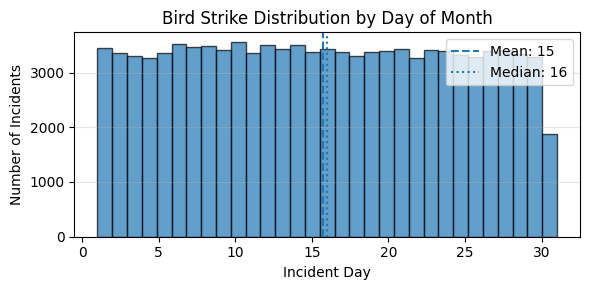

In [114]:
plt.figure(figsize=(6,3))

plt.hist(
    df['Incident Day'],
    bins=31,
    edgecolor='black',
    alpha=0.7
)

mean_day = df['Incident Day'].mean()
median_day = df['Incident Day'].median()

plt.axvline(mean_day, linestyle='--', linewidth=1.5, label=f'Mean: {int(mean_day)}')
plt.axvline(median_day, linestyle=':', linewidth=1.5, label=f'Median: {int(median_day)}')

plt.xlabel('Incident Day')
plt.ylabel('Number of Incidents')
plt.title('Bird Strike Distribution by Day of Month')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
